# Data Loading and Basic Processing

In [2]:
from google.colab import drive

# This will prompt for authorization.
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [3]:
!ls "drive/My Drive/6th Semester Labs/ML Lab/Project"
!cd "drive/My Drive/6th Semester Labs/ML Lab/Project"

WA_Fn-UseC_-Telco-Customer-Churn.csv


In [4]:
import pandas as pd
import io
df = pd.read_csv('drive/My Drive/6th Semester Labs/ML Lab/Project/WA_Fn-UseC_-Telco-Customer-Churn.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [5]:
df.TotalCharges = pd.to_numeric(df.TotalCharges, errors='coerce')
df.isnull().sum()

df.dropna(inplace = True)
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [0]:
df['Churn'].replace(to_replace='Yes', value=1, inplace=True)
df['Churn'].replace(to_replace='No',  value=0, inplace=True)
df.drop('customerID', axis=1, inplace=True)

# EDA

In [0]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_palette('pastel')

Text(0.5, 1.0, 'Number of Users Churning/Not Churning')

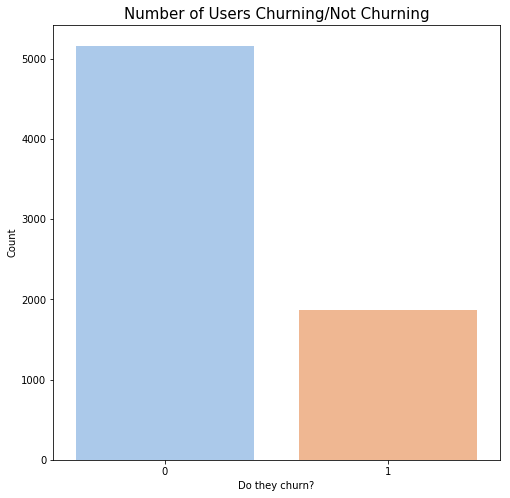

In [8]:
plt.figure(figsize=(8,8))
ax = sns.countplot(x='Churn', data=df)
ax.set_xlabel('Do they churn?')
ax.set_ylabel('Count')
ax.set_title('Number of Users Churning/Not Churning', fontsize=15)

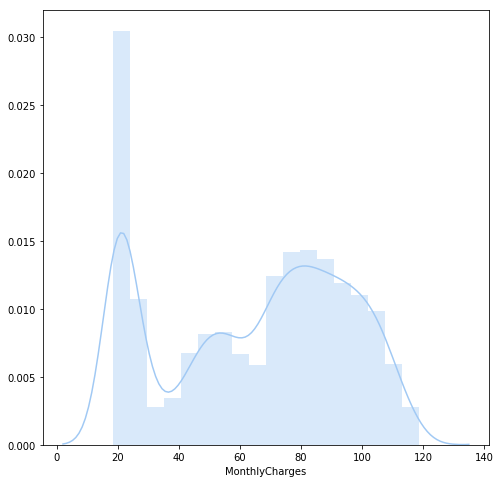

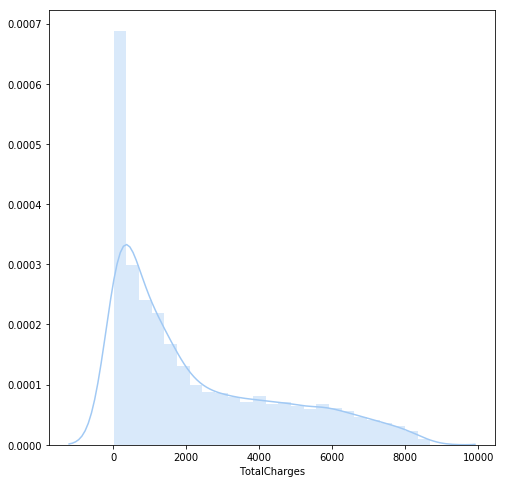

In [9]:
plt.figure(figsize=(8,8))
ax = sns.distplot(df["MonthlyCharges"] , kde=True)
plt.figure(figsize=(8,8))
ax = sns.distplot(df["TotalCharges"] , kde=True)

Text(0.5, 1.0, 'Tenure vs Churn')

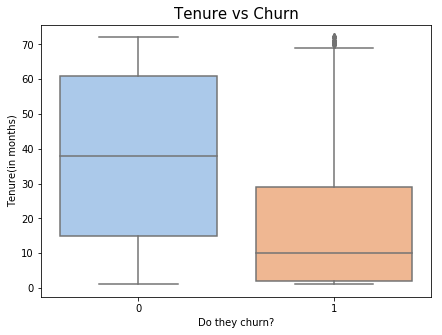

In [10]:
plt.figure(figsize=(7,5))
ax = sns.boxplot(x = 'Churn', y = 'tenure', data=df)
ax.set_xlabel('Do they churn?')
ax.set_ylabel("Tenure(in months)")
ax.set_title('Tenure vs Churn', fontsize=15)

Text(0.5, 0, 'Contract Type')

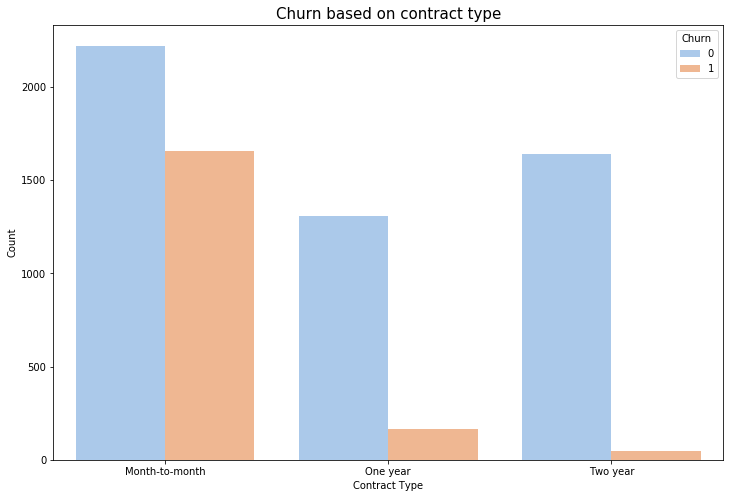

In [11]:
plt.figure(figsize=(12,8))
ax = sns.countplot(x="Contract", hue="Churn", data=df);
ax.set_title('Churn based on contract type', fontsize=15)
ax.set_ylabel('Count')
ax.set_xlabel('Contract Type')

Text(0.5, 1.0, 'Churn Based on Internet Service Type')

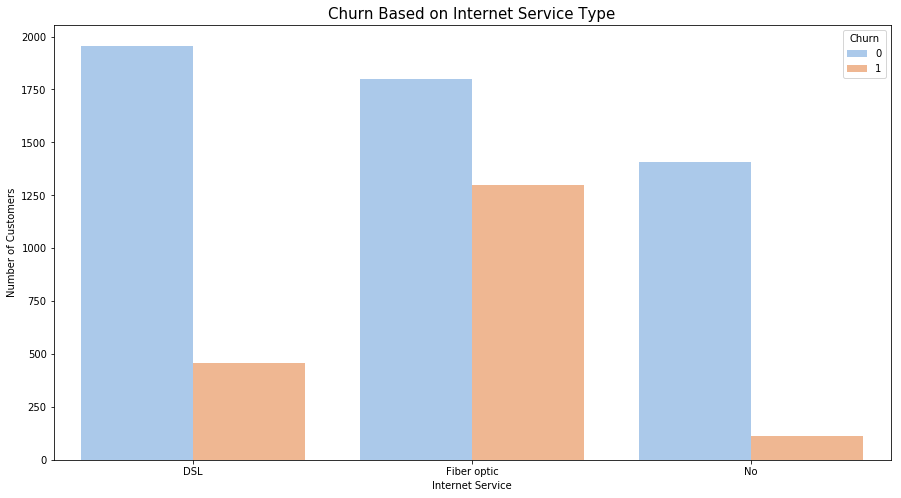

In [12]:
plt.figure(figsize=(15,8))
ax = sns.countplot(x='InternetService', hue='Churn', data=df);
ax.set_ylabel('Number of Customers')
ax.set_xlabel('Internet Service')
ax.set_title('Churn Based on Internet Service Type', fontsize=15)

Text(0.5, 1.0, 'Total Charges vs Churn Density Plot')

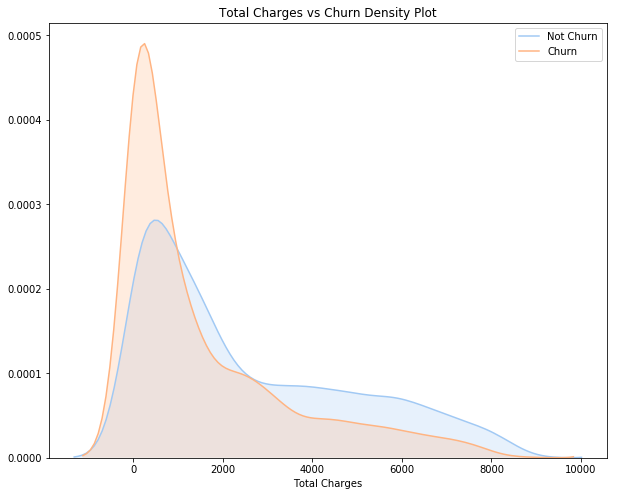

In [13]:
plt.figure(figsize=(10,8))
ax = sns.kdeplot(df[(df["Churn"] == 0)]['TotalCharges'], shade = True)
ax = sns.kdeplot(df[(df["Churn"] == 1)]['TotalCharges'], ax=ax, shade= True)
ax.legend(["Not Churn","Churn"])
ax.set_xlabel('Total Charges')
ax.set_title('Total Charges vs Churn Density Plot')

Text(0.5, 0, 'Senior Citizen?')

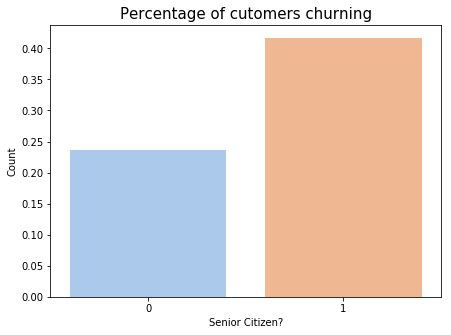

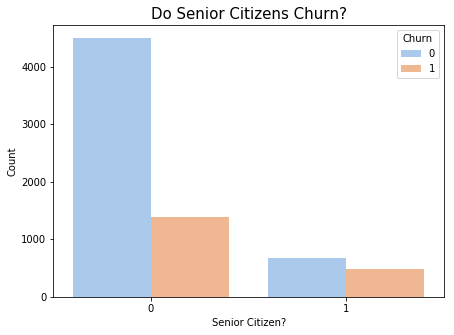

In [14]:
agg = df.groupby('SeniorCitizen', as_index=True).agg(['sum', 'count'])['Churn']
agg['perc'] = agg['sum'].div(agg['count'].values, axis=0)
agg['SeniorCitizen'] = agg.index

plt.figure(figsize=(7,5))
ax = sns.barplot(x="SeniorCitizen", y="perc", data=agg);
ax.set_title('Percentage of cutomers churning', fontsize=15)
ax.set_ylabel('Count')
ax.set_xlabel('Senior Citizen?')

plt.figure(figsize=(7,5))
ax = sns.countplot(x="SeniorCitizen", hue="Churn", data=df);
ax.set_title('Do Senior Citizens Churn?', fontsize=15)
ax.set_ylabel('Count')
ax.set_xlabel('Senior Citizen?')

# Classification

In [15]:
data = pd.get_dummies(df)
data.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,...,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,29.85,29.85,0,1,0,0,1,1,...,0,1,0,0,0,1,0,0,1,0
1,0,34,56.95,1889.50,0,0,1,1,0,1,...,0,0,1,0,1,0,0,0,0,1
2,0,2,53.85,108.15,1,0,1,1,0,1,...,0,1,0,0,0,1,0,0,0,1
3,0,45,42.30,1840.75,0,0,1,1,0,1,...,0,0,1,0,1,0,1,0,0,0
4,0,2,70.70,151.65,1,1,0,1,0,1,...,0,1,0,0,0,1,0,0,1,0


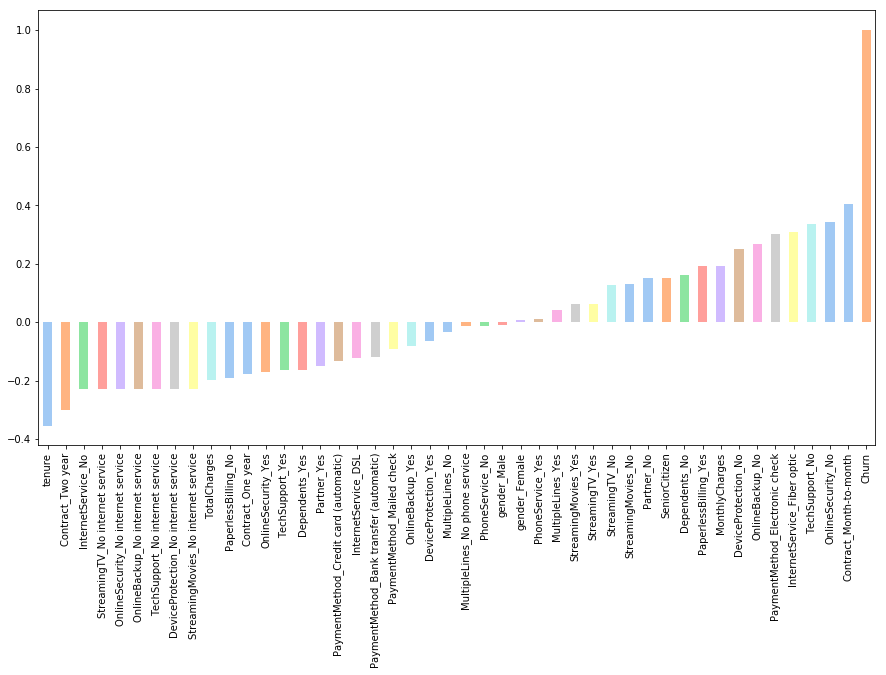

In [16]:
plt.figure(figsize=(15,8))
data.corr()['Churn'].sort_values().plot(kind='bar')

In [0]:
from sklearn.model_selection import train_test_split
X = data.drop('Churn', axis=1)
y = data['Churn'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=99)

## Pre-Processing

In [18]:
from sklearn.preprocessing import MinMaxScaler
features = X.columns.values
scaler = MinMaxScaler(feature_range = (0,1))
scaler.fit(X_train)
X_train_mm = pd.DataFrame(scaler.transform(X_train))
X_train_mm.columns = features
X_train_mm.head()

X_test_mm = pd.DataFrame(scaler.transform(X_test))
X_test_mm.columns = features
X_test_mm.head()


from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

scaler.fit(X_train)
X_train_sc = pd.DataFrame(scaler.transform(X_train))
X_train_sc.columns = features
X_train_sc.head()

X_test_sc = pd.DataFrame(scaler.transform(X_test))
X_test_sc.columns = features
X_test_sc.head()


from sklearn.decomposition import PCA
pca = PCA(.9)
pca.fit(X_train_sc)

X_train_pca = pca.transform(X_train_sc)
X_test_pca = pca.transform(X_test_sc)


/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/data.py:334: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)
/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:18: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:22: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.


## Logistic Regression

### Logistic Regression (with Min-Max Scaling)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='liblinear',
          tol=0.0001, verbose=0, warm_start=False)

 Classification report : 
               precision    recall  f1-score   support

           0       0.85      0.91      0.88      1042
           1       0.69      0.56      0.62       365

   micro avg       0.82      0.82      0.82      1407
   macro avg       0.77      0.73      0.75      1407
weighted avg       0.81      0.82      0.81      1407

Accuracy Score :  0.820184790334044





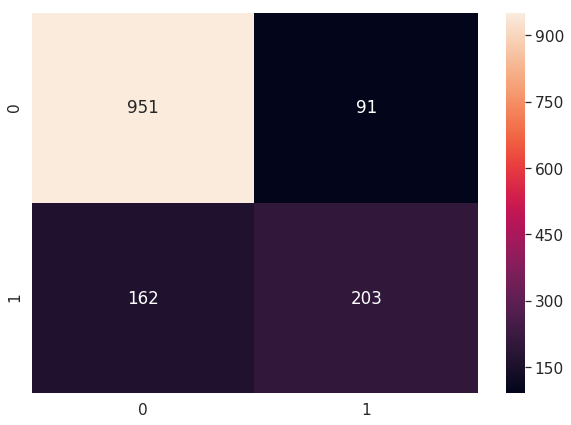

In [96]:
#X_train_mm.corr()

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report

model = LogisticRegression(C=1.0, class_weight=None, dual=False,
          penalty='l2', random_state=None, solver='liblinear',
          verbose=0, warm_start=False)

model.fit(X_train_mm,y_train)
predictions   = model.predict(X_test_mm)

print(model)
cr_lr_mm = classification_report(y_test,predictions)
print("\n Classification report : \n",cr_lr_mm)
acc_lr_mm = accuracy_score(y_test,predictions)
print("Accuracy Score : ",acc_lr_mm)
print("\n\n")

plt.figure(figsize = (10,7))
sns.set(font_scale=1.4)
sns.heatmap(confusion_matrix(y_test,predictions), annot=True, fmt='g')

### Logistic Regression (with PCA)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

 Classification report : 
               precision    recall  f1-score   support

           0       0.84      0.91      0.88      1042
           1       0.67      0.52      0.59       365

   micro avg       0.81      0.81      0.81      1407
   macro avg       0.76      0.72      0.73      1407
weighted avg       0.80      0.81      0.80      1407

Accuracy Score :  0.8095238095238095





/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


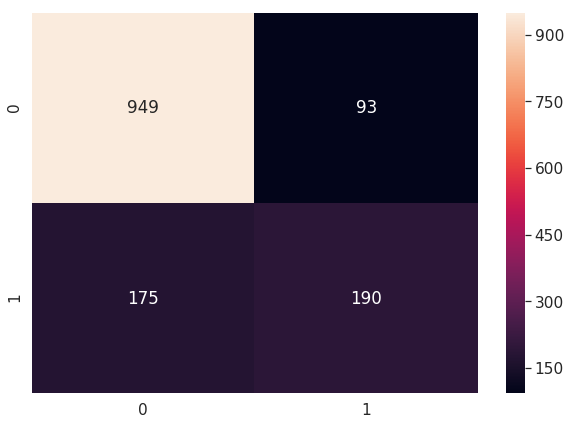

In [20]:
model = LogisticRegression()

model.fit(X_train_pca,y_train)
predictions   = model.predict(X_test_pca)
probabilities = model.predict_proba(X_test_pca)
coefficients  = pd.DataFrame(model.coef_.ravel())

print(model)
cr_lr_pca = classification_report(y_test,predictions)
print("\n Classification report : \n",cr_lr_pca)
acc_lr_pca = accuracy_score(y_test,predictions)
print("Accuracy Score : ",acc_lr_pca)
print("\n\n")

plt.figure(figsize = (10,7))
sns.set(font_scale=1.4)
sns.heatmap(confusion_matrix(y_test,predictions), annot=True, fmt='g')

## Decision Tree


### Decision Tree (with Min-Max Scaling)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=5,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

 Classification report : 
               precision    recall  f1-score   support

           0       0.87      0.88      0.87      1042
           1       0.65      0.61      0.63       365

   micro avg       0.81      0.81      0.81      1407
   macro avg       0.76      0.75      0.75      1407
weighted avg       0.81      0.81      0.81      1407

Accuracy Score :  0.8130774697938877





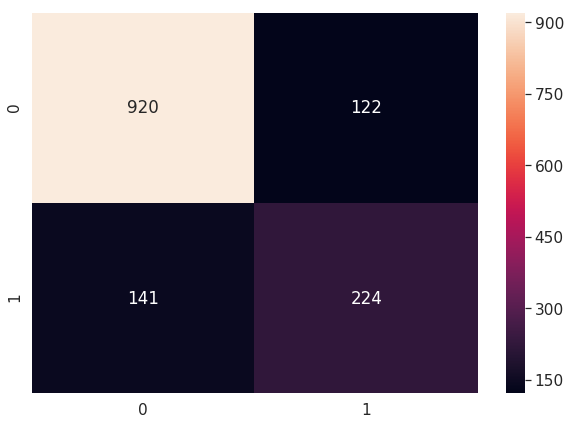

In [21]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier(criterion="entropy", max_depth=5)
model.fit(X_train_mm, y_train)
predictions   = model.predict(X_test_mm)
probabilities = model.predict_proba(X_test_mm)


print(model)
cr_dt_mm = classification_report(y_test,predictions)
print("\n Classification report : \n",cr_dt_mm)
acc_dt_mm = accuracy_score(y_test,predictions)
print("Accuracy Score : ",acc_dt_mm)
print("\n\n")

plt.figure(figsize = (10,7))
sns.set(font_scale=1.4)
sns.heatmap(confusion_matrix(y_test,predictions), annot=True, fmt='g')



### Decision Tree (with PCA)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

 Classification report : 
               precision    recall  f1-score   support

           0       0.82      0.91      0.86      1042
           1       0.63      0.44      0.52       365

   micro avg       0.79      0.79      0.79      1407
   macro avg       0.73      0.68      0.69      1407
weighted avg       0.77      0.79      0.77      1407

Accuracy Score :  0.7882018479033405





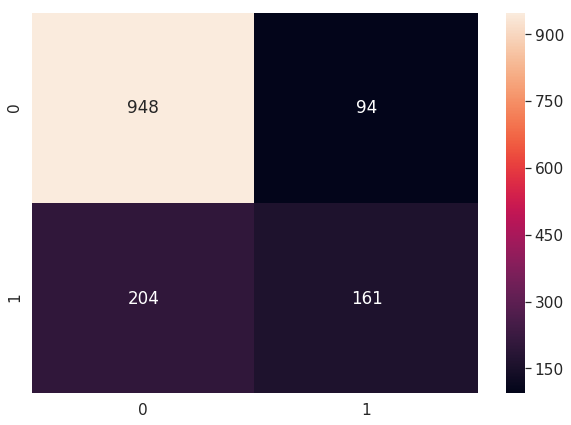

In [22]:
model = DecisionTreeClassifier(criterion="gini", max_depth=5)
model.fit(X_train_pca, y_train)
predictions   = model.predict(X_test_pca)
probabilities = model.predict_proba(X_test_pca)

print(model)
cr_dt_pca = classification_report(y_test,predictions)
print("\n Classification report : \n",cr_dt_pca)
acc_dt_pca = accuracy_score(y_test,predictions)
print("Accuracy Score : ",acc_dt_pca)
print("\n\n")

plt.figure(figsize = (10,7))
sns.set(font_scale=1.4)
sns.heatmap(confusion_matrix(y_test,predictions), annot=True, fmt='g')

### Decision Tree (Baseline)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=4,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

 Classification report : 
               precision    recall  f1-score   support

           0       0.84      0.93      0.88      1042
           1       0.70      0.48      0.57       365

   micro avg       0.81      0.81      0.81      1407
   macro avg       0.77      0.71      0.73      1407
weighted avg       0.80      0.81      0.80      1407

Accuracy Score :  0.8130774697938877





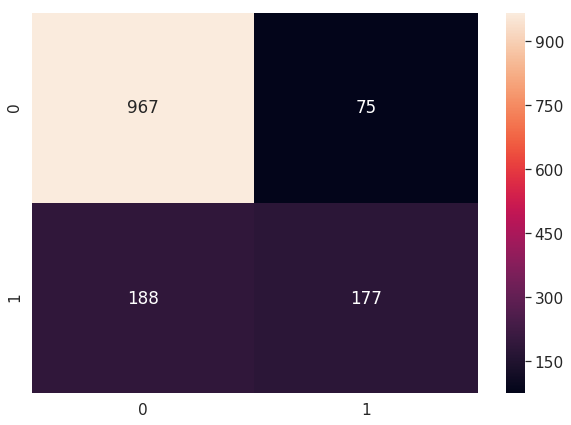

In [98]:
model = DecisionTreeClassifier(criterion="entropy", max_depth=4)
model.fit(X_train, y_train)
predictions   = model.predict(X_test)
probabilities = model.predict_proba(X_test)

print(model)
cr_dt = classification_report(y_test,predictions)
print("\n Classification report : \n",cr_dt)
acc_dt = accuracy_score(y_test,predictions)
print("Accuracy Score : ",acc_dt)
print("\n\n")

plt.figure(figsize = (10,7))
sns.set(font_scale=1.4)
sns.heatmap(confusion_matrix(y_test,predictions), annot=True, fmt='g')

### Random Forest (with Min-Max Scaling)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=30,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=1000, n_jobs=None,
            oob_score=True, random_state=None, verbose=0, warm_start=False)

 Classification report : 
               precision    recall  f1-score   support

           0       0.84      0.94      0.89      1042
           1       0.73      0.49      0.59       365

   micro avg       0.82      0.82      0.82      1407
   macro avg       0.78      0.71      0.74      1407
weighted avg       0.81      0.82      0.81      1407

Accuracy Score :  0.820184790334044





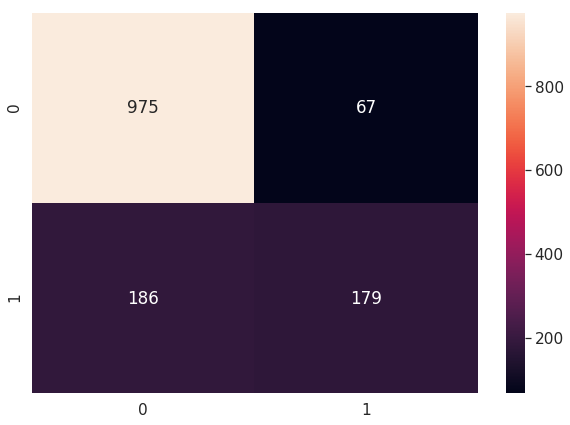

In [99]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=1000 , oob_score = True, max_features = "auto", max_leaf_nodes = 30)
model.fit(X_train_mm, y_train)
predictions   = model.predict(X_test_mm)
probabilities = model.predict_proba(X_test_mm)

print(model)
cr_rf_mm = classification_report(y_test,predictions)
print("\n Classification report : \n",cr_rf_mm)
acc_rf_mm = accuracy_score(y_test,predictions)
print("Accuracy Score : ",acc_rf_mm)
print("\n\n")

plt.figure(figsize = (10,7))
sns.set(font_scale=1.4)
sns.heatmap(confusion_matrix(y_test,predictions), annot=True, fmt='g')

feature_imp = pd.Series(model.feature_importances_).sort_values(ascending=False)
#feature_imp

## SVM

### SVM (with Min-Max Scaling)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='linear', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

 Classification report : 
               precision    recall  f1-score   support

           0       0.85      0.91      0.88      1042
           1       0.69      0.55      0.61       365

   micro avg       0.82      0.82      0.82      1407
   macro avg       0.77      0.73      0.75      1407
weighted avg       0.81      0.82      0.81      1407

Accuracy Score :  0.820184790334044





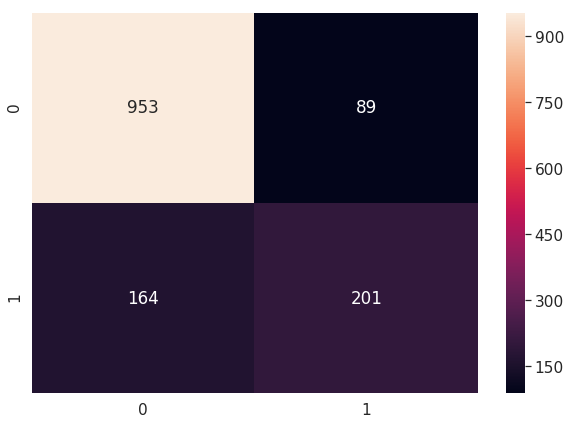

In [25]:
from sklearn.svm import SVC
model = SVC(kernel='linear')
model.fit(X_train_mm, y_train)
predictions   = model.predict(X_test_mm)

print(model)
cr_svm_mm = classification_report(y_test,predictions)
print("\n Classification report : \n",cr_svm_mm)
acc_svm_mm = accuracy_score(y_test,predictions)
print("Accuracy Score : ",acc_svm_mm)
print("\n\n")

plt.figure(figsize = (10,7))
sns.set(font_scale=1.4)
sns.heatmap(confusion_matrix(y_test,predictions), annot=True, fmt='g')


### SVM (with PCA)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

 Classification report : 
               precision    recall  f1-score   support

           0       0.85      0.91      0.88      1042
           1       0.67      0.54      0.60       365

   micro avg       0.81      0.81      0.81      1407
   macro avg       0.76      0.72      0.74      1407
weighted avg       0.80      0.81      0.81      1407

Accuracy Score :  0.8130774697938877





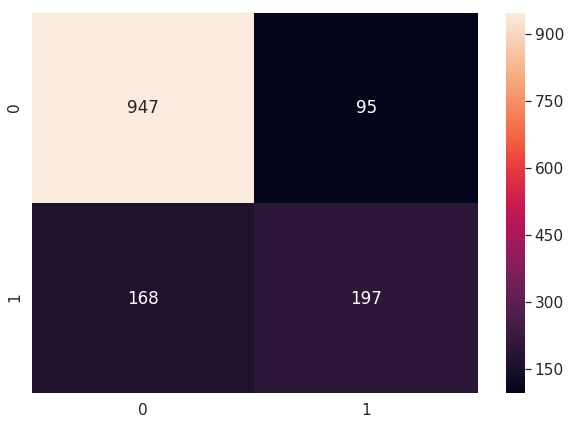

In [26]:
from sklearn.svm import SVC
model = SVC(gamma='scale', kernel='linear')
model.fit(X_train_pca, y_train)
predictions   = model.predict(X_test_pca)

print(model)
cr_svm_pca = classification_report(y_test,predictions)
print("\n Classification report : \n",cr_svm_pca)
acc_svm_pca = accuracy_score(y_test,predictions)
print("Accuracy Score : ",acc_svm_pca)
print("\n\n")

plt.figure(figsize = (10,7))
sns.set(font_scale=1.4)
sns.heatmap(confusion_matrix(y_test,predictions), annot=True, fmt='g')


## Neural Network

In [27]:
from keras.models import Sequential
from keras.layers import Dense
import numpy
# fix random seed for reproducibility
numpy.random.seed(7)
X_train_mm.shape

Using TensorFlow backend.


(5625, 45)

### Neural Network (with Min-Max Scaling)

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.

 Classification report : 
               precision    recall  f1-score   support

           0       0.84      0.89      0.86      1042
           1       0.62      0.50      0.55       365

   micro avg       0.79      0.79      0.79      1407
   macro avg       0.73      0.70      0.71      1407
weighted avg       0.78      0.79      0.78      1407

Accuracy Score :  0.7896233120113717





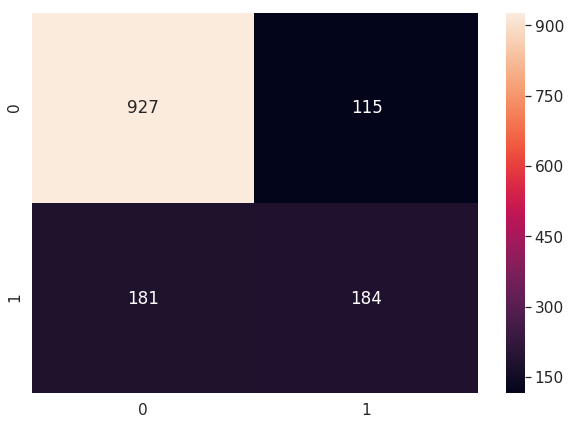

In [28]:
model = Sequential()
model.add(Dense(25, input_dim=45, activation='relu'))
model.add(Dense(9, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

model.fit(X_train_mm, y_train, epochs=200, batch_size=40, verbose=0)

predictions_init = model.predict(X_test_mm)
predictions = [round(x[0]) for x in predictions_init]

print(model)
cr_nn_mm = classification_report(y_test,predictions)
print("\n Classification report : \n",cr_nn_mm)
acc_nn_mm = accuracy_score(y_test,predictions)
print("Accuracy Score : ",acc_nn_mm)
print("\n\n")

plt.figure(figsize = (10,7))
sns.set(font_scale=1.4)
sns.heatmap(confusion_matrix(y_test,predictions), annot=True, fmt='g')


### Neural Network (with PCA)


 Classification report : 
               precision    recall  f1-score   support

           0       0.84      0.90      0.87      1042
           1       0.63      0.50      0.56       365

   micro avg       0.79      0.79      0.79      1407
   macro avg       0.73      0.70      0.71      1407
weighted avg       0.78      0.79      0.79      1407

Accuracy Score :  0.7938877043354655





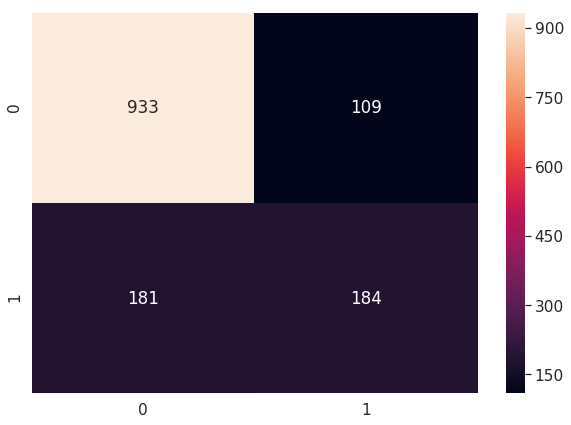

In [29]:
model = Sequential()
model.add(Dense(14, input_dim=16, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

model.fit(X_train_pca, y_train, epochs=300, batch_size=30, verbose=0)

predictions_init = model.predict(X_test_pca)
predictions = [round(x[0]) for x in predictions_init]

print(model)
cr_nn_pca = classification_report(y_test,predictions)
print("\n Classification report : \n",cr_nn_pca)
acc_nn_pca = accuracy_score(y_test,predictions)
print("Accuracy Score : ",acc_nn_pca)
print("\n\n")

plt.figure(figsize = (10,7))
sns.set(font_scale=1.4)
sns.heatmap(confusion_matrix(y_test,predictions), annot=True, fmt='g')


## Boosting Algorithms

### AdaBoost (with Min-Max Scaling)


AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1,
          n_estimators=170, random_state=None)

 Classification report : 
               precision    recall  f1-score   support

           0       0.85      0.91      0.88      1042
           1       0.69      0.55      0.61       365

   micro avg       0.82      0.82      0.82      1407
   macro avg       0.77      0.73      0.75      1407
weighted avg       0.81      0.82      0.81      1407

Accuracy Score :  0.820184790334044





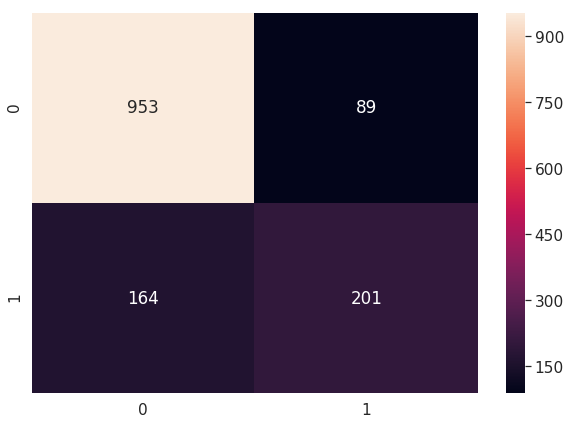

In [101]:
from sklearn.ensemble import AdaBoostClassifier
model = AdaBoostClassifier(n_estimators=170, learning_rate=1)

model.fit(X_train_mm, y_train)
predictions = model.predict(X_test_mm)

print(model)
cr_ada_mm = classification_report(y_test,predictions)
print("\n Classification report : \n",cr_ada_mm)
acc_ada_mm = accuracy_score(y_test,predictions)
print("Accuracy Score : ",acc_ada_mm)
print("\n\n")

plt.figure(figsize = (10,7))
sns.set(font_scale=1.4)
sns.heatmap(confusion_matrix(y_test,predictions), annot=True, fmt='g')


### AdaBoost (with PCA)

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1,
          n_estimators=150, random_state=None)

 Classification report : 
               precision    recall  f1-score   support

           0       0.84      0.90      0.87      1042
           1       0.65      0.52      0.58       365

   micro avg       0.80      0.80      0.80      1407
   macro avg       0.74      0.71      0.72      1407
weighted avg       0.79      0.80      0.79      1407

Accuracy Score :  0.8017057569296375





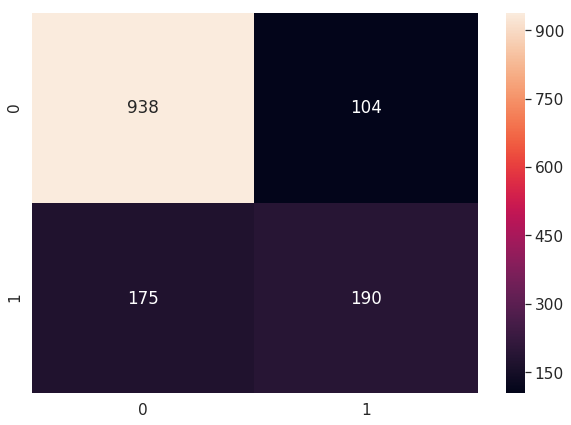

In [56]:
model = AdaBoostClassifier(n_estimators=150, learning_rate=1)

model.fit(X_train_pca, y_train)
predictions = model.predict(X_test_pca)

print(model)
cr_ada_pca = classification_report(y_test,predictions)
print("\n Classification report : \n",cr_ada_pca)
acc_ada_pca = accuracy_score(y_test,predictions)
print("Accuracy Score : ",acc_ada_pca)
print("\n\n")

plt.figure(figsize = (10,7))
sns.set(font_scale=1.4)
sns.heatmap(confusion_matrix(y_test,predictions), annot=True, fmt='g')

### XGBoost (with Min-Max Scaling)

XGBClassifier(base_score=0.5, booster='dart', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, min_split_loss=0.5, missing=None,
       n_estimators=100, n_jobs=1, nthread=None,
       objective='binary:logistic', random_state=0, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, seed=None, silent=True,
       subsample=1, tree_method='exact')

 Classification report : 
               precision    recall  f1-score   support

           0       0.86      0.92      0.89      1042
           1       0.72      0.57      0.63       365

   micro avg       0.83      0.83      0.83      1407
   macro avg       0.79      0.74      0.76      1407
weighted avg       0.82      0.83      0.82      1407

Accuracy Score :  0.830135039090263





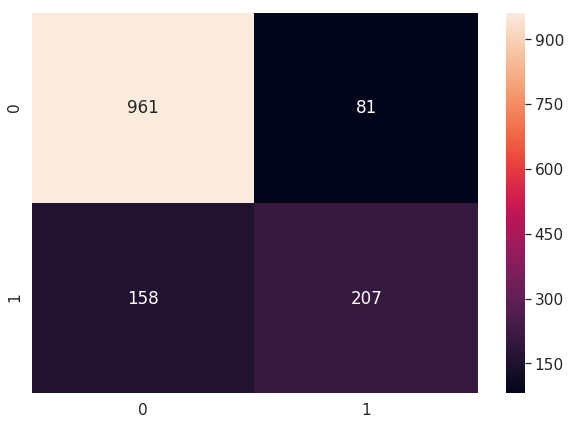

In [125]:
from xgboost import XGBClassifier

model = XGBClassifier(learning_rate=0.1,  
                      colsample_bytree = 0.4,
                      subsample = 0.8,
                      objective='binary:logistic', 
                      n_estimators=1000, 
                      reg_alpha = 0.3,
                      max_depth=4, 
                      gamma=10)

model = XGBClassifier(booster='dart', learning_rate=0.1, min_split_loss=0.5, tree_method='exact')


model.fit(X_train_mm, y_train)
predictions = model.predict(X_test_mm)

print(model)
cr_xgb_mm = classification_report(y_test,predictions)
print("\n Classification report : \n",cr_xgb_mm)
acc_xgb_mm = accuracy_score(y_test,predictions)
print("Accuracy Score : ",acc_xgb_mm)
print("\n\n")

plt.figure(figsize = (10,7))
sns.set(font_scale=1.4)
sns.heatmap(confusion_matrix(y_test,predictions), annot=True, fmt='g')



### XGBoost (with PCA)

XGBClassifier(base_score=0.5, booster='dart', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, min_split_loss=0.5, missing=None,
       n_estimators=100, n_jobs=1, nthread=None,
       objective='binary:logistic', random_state=0, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, seed=None, silent=True,
       subsample=1)

 Classification report : 
               precision    recall  f1-score   support

           0       0.84      0.91      0.87      1042
           1       0.66      0.49      0.57       365

   micro avg       0.80      0.80      0.80      1407
   macro avg       0.75      0.70      0.72      1407
weighted avg       0.79      0.80      0.79      1407

Accuracy Score :  0.8038379530916845





TypeError: ignored

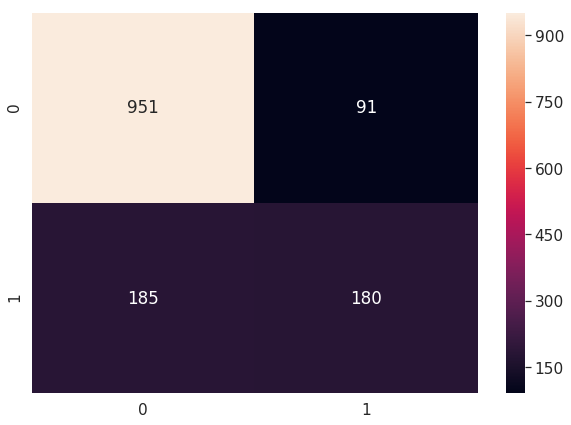

In [104]:
from xgboost import XGBClassifier

'''
model = XGBClassifier(silent=False, 
                      learning_rate=0.01,  
                      colsample_bytree = 0.4,
                      subsample = 0.8,
                      objective='binary:logistic', 
                      n_estimators=1000, 
                      reg_alpha = 0.3,
                      max_depth=4, 
                      gamma=10)
'''
model = XGBClassifier(booster='dart', learning_rate=0.1, min_split_loss=0.5)


model.fit(X_train_pca, y_train)
predictions = model.predict(X_test_pca)

print(model)
cr_xgb_pca = classification_report(y_test,predictions)
print("\n Classification report : \n",cr_xgb_pca)
acc_xgb_pca = accuracy_score(y_test,predictions)
print("Accuracy Score : ",acc_xgb_pca)
print("\n\n")

plt.figure(figsize = (10,7))
sns.set(font_scale=1.4)
sns.heatmap(confusion_matrix(y_test,predictions), annot=True, fmt='g')


# Results


In [127]:
def cr_output(report):
    report_data = []
    lines = report.split('\n')
    for line in lines[2:-5]:
        
        row = {}
        row_data = line.split('      ')        
        row['class'] = row_data[1].strip()
        row['precision'] = float(row_data[2])
        row['recall'] = float(row_data[3])
        row['f1_score'] = float(row_data[4])
        row['support'] = float(row_data[5])
        report_data.append(row)
        
    return (report_data)


#Cumulative Results - 
results = {
    'Classifier' : [
        "Logistic Regression (with Min-Max Scaling)",
        "Logistic Regression (with PCA)",
        "Decision Tree (with Min-Max Scaling)",
        "Decision Tree (with PCA)",
        "Decision Tree (Baseline)",
        "Random Forest (with Min-Max Scaling)",
        "SVM (with Min-Max Scaling)",
        "SVM (with PCA)",
        "Neural Network (with Min-Max Scaling)",
        "Neural Network (with PCA)",
        "AdaBoost (with Min-Max Scaling)",
        "AdaBoost (with PCA)",
        "XGBoost (with Min-Max Scaling)",
        "XGBoost (with PCA)"
]
    ,
    'Accuracy' : [
        acc_lr_mm,
        acc_lr_pca,
        acc_dt_mm,
        acc_dt_pca,
        acc_dt,
        acc_rf_mm,
        acc_svm_mm,
        acc_svm_pca,
        acc_nn_mm,
        acc_nn_pca,
        acc_ada_mm,
        acc_ada_pca,
        acc_xgb_mm,
        acc_xgb_pca
    ]
    ,
    'Precision for Class 0' : [
        cr_output(cr_lr_mm)[0]['precision'],
        cr_output(cr_lr_pca)[0]['precision'],
        cr_output(cr_dt_mm)[0]['precision'],
        cr_output(cr_dt_pca)[0]['precision'],
        cr_output(cr_dt)[0]['precision'],
        cr_output(cr_rf_mm)[0]['precision'],
        cr_output(cr_svm_mm)[0]['precision'],
        cr_output(cr_svm_pca)[0]['precision'],
        cr_output(cr_nn_mm)[0]['precision'],
        cr_output(cr_nn_pca)[0]['precision'],
        cr_output(cr_ada_mm)[0]['precision'],
        cr_output(cr_ada_pca)[0]['precision'],
        cr_output(cr_xgb_mm)[0]['precision'],
        cr_output(cr_xgb_pca)[0]['precision']
    ]
    ,
    'Precision for Class 1' : [
        cr_output(cr_lr_mm)[1]['precision'],
        cr_output(cr_lr_pca)[1]['precision'],
        cr_output(cr_dt_mm)[1]['precision'],
        cr_output(cr_dt_pca)[1]['precision'],
        cr_output(cr_dt)[1]['precision'],
        cr_output(cr_rf_mm)[1]['precision'],
        cr_output(cr_svm_mm)[1]['precision'],
        cr_output(cr_svm_pca)[1]['precision'],
        cr_output(cr_nn_mm)[1]['precision'],
        cr_output(cr_nn_pca)[1]['precision'],
        cr_output(cr_ada_mm)[1]['precision'],
        cr_output(cr_ada_pca)[1]['precision'],
        cr_output(cr_xgb_mm)[1]['precision'],
        cr_output(cr_xgb_pca)[1]['precision']
    ]
    ,
    'Recall for Class 0' : [
                cr_output(cr_lr_mm)[0]['recall'],
        cr_output(cr_lr_pca)[0]['recall'],
        cr_output(cr_dt_mm)[0]['recall'],
        cr_output(cr_dt_pca)[0]['recall'],
        cr_output(cr_dt)[0]['recall'],
        cr_output(cr_rf_mm)[0]['recall'],
        cr_output(cr_svm_mm)[0]['recall'],
        cr_output(cr_svm_pca)[0]['recall'],
        cr_output(cr_nn_mm)[0]['recall'],
        cr_output(cr_nn_pca)[0]['recall'],
        cr_output(cr_ada_mm)[0]['recall'],
        cr_output(cr_ada_pca)[0]['recall'],
        cr_output(cr_xgb_mm)[0]['recall'],
        cr_output(cr_xgb_pca)[0]['recall']
    ]
    ,
    'Recall for Class 1' : [
        cr_output(cr_lr_mm)[1]['recall'],
        cr_output(cr_lr_pca)[1]['recall'],
        cr_output(cr_dt_mm)[1]['recall'],
        cr_output(cr_dt_pca)[1]['recall'],
        cr_output(cr_dt)[1]['recall'],
        cr_output(cr_rf_mm)[1]['recall'],
        cr_output(cr_svm_mm)[1]['recall'],
        cr_output(cr_svm_pca)[1]['recall'],
        cr_output(cr_nn_mm)[1]['recall'],
        cr_output(cr_nn_pca)[1]['recall'],
        cr_output(cr_ada_mm)[1]['recall'],
        cr_output(cr_ada_pca)[1]['recall'],
        cr_output(cr_xgb_mm)[1]['recall'],
        cr_output(cr_xgb_pca)[1]['recall']
    ]
    ,
    'F-Score for Class 0' : [
        cr_output(cr_lr_mm)[0]['f1_score'],
        cr_output(cr_lr_pca)[0]['f1_score'],
        cr_output(cr_dt_mm)[0]['f1_score'],
        cr_output(cr_dt_pca)[0]['f1_score'],
        cr_output(cr_dt)[0]['f1_score'],
        cr_output(cr_rf_mm)[0]['f1_score'],
        cr_output(cr_svm_mm)[0]['f1_score'],
        cr_output(cr_svm_pca)[0]['f1_score'],
        cr_output(cr_nn_mm)[0]['f1_score'],
        cr_output(cr_nn_pca)[0]['f1_score'],
        cr_output(cr_ada_mm)[0]['f1_score'],
        cr_output(cr_ada_pca)[0]['f1_score'],
        cr_output(cr_xgb_mm)[0]['f1_score'],
        cr_output(cr_xgb_pca)[0]['f1_score']
    ]
    ,
    'F-Score for Class 1' :[
        cr_output(cr_lr_mm)[1]['f1_score'],
        cr_output(cr_lr_pca)[1]['f1_score'],
        cr_output(cr_dt_mm)[1]['f1_score'],
        cr_output(cr_dt_pca)[1]['f1_score'],
        cr_output(cr_dt)[1]['f1_score'],
        cr_output(cr_rf_mm)[1]['f1_score'],
        cr_output(cr_svm_mm)[1]['f1_score'],
        cr_output(cr_svm_pca)[1]['f1_score'],
        cr_output(cr_nn_mm)[1]['f1_score'],
        cr_output(cr_nn_pca)[1]['f1_score'],
        cr_output(cr_ada_mm)[1]['f1_score'],
        cr_output(cr_ada_pca)[1]['f1_score'],
        cr_output(cr_xgb_mm)[1]['f1_score'],
        cr_output(cr_xgb_pca)[1]['f1_score']
    ]
}

result_df = pd.DataFrame.from_dict(results)
result_df

,Classifier,Accuracy,Precision for Class 0,Precision for Class 1,Recall for Class 0,Recall for Class 1,F-Score for Class 0,F-Score for Class 1
0,Logistic Regression (with Min-Max Scaling),0.820185,0.85,0.69,0.91,0.56,0.88,0.62
1,Logistic Regression (with PCA),0.809524,0.84,0.67,0.91,0.52,0.88,0.59
2,Decision Tree (with Min-Max Scaling),0.813077,0.87,0.65,0.88,0.61,0.87,0.63
3,Decision Tree (with PCA),0.788202,0.82,0.63,0.91,0.44,0.86,0.52
4,Decision Tree (Baseline),0.813077,0.84,0.70,0.93,0.48,0.88,0.57
5,Random Forest (with Min-Max Scaling),0.820185,0.84,0.73,0.94,0.49,0.89,0.59
6,SVM (with Min-Max Scaling),0.820185,0.85,0.69,0.91,0.55,0.88,0.61
7,SVM (with PCA),0.813077,0.85,0.67,0.91,0.54,0.88,0.60
8,Neural Network (with Min-Max Scaling),0.789623,0.84,0.62,0.89,0.50,0.86,0.55
9,Neural Network (with PCA),0.793888,0.84,0.63,0.90,0.50,0.87,0.56


## Findings

Looking at these results we can see that Logistic Regression, Random Forest, SVM, AdaBoost and XGBoost all have accuracies over 82%. We discard Logistic Regression due to the presence of multicollinearity in the data. The others are not as affected by this.  

---
This could imply that these are the models that should be used for predicting Customer Churn. But just accuracy isn't enough as we should also check the precision and recall. 

---

Therefore, we must look at the F-Score of the model. Looking at the results above, we see that the F-Scores of these models are 60%. Therefore, we can try and make the model more sensitive to the negative class and avoid the number of False Negatives. 

---

Now, we take the classifier with the maximum accuracy as well as the maximum F-Score from the group i.e. the XGBoost model and try and make the model more sensitive towards these performance metrics. 

## Making the model Sensitive

In [131]:
from xgboost import XGBClassifier

model = XGBClassifier(learning_rate=0.1,  
                      colsample_bytree = 0.4,
                      subsample = 0.8,
                      objective='binary:logistic', 
                      n_estimators=1000, 
                      reg_alpha = 0.3,
                      max_depth=4, 
                      gamma=10)

model = XGBClassifier(booster='dart', learning_rate=0.1, min_split_loss=0.5, tree_method='exact', scale_pos_weight=1.75)


model.fit(X_train_mm, y_train)
predictions = model.predict(X_test_mm)

cr_xgb_sens = classification_report(y_test,predictions)
acc_xgb_sens = accuracy_score(y_test,predictions)
print("Accuracy Score : ",acc_xgb_sens)
print("\n")
print("\n Classification report : \n",cr_xgb_sens)

Accuracy Score :  0.8088130774697939



 Classification report : 
               precision    recall  f1-score   support

           0       0.89      0.84      0.87      1042
           1       0.61      0.72      0.66       365

   micro avg       0.81      0.81      0.81      1407
   macro avg       0.75      0.78      0.76      1407
weighted avg       0.82      0.81      0.81      1407



In the above model, we have made the model more sensitive to the Negative class by tuning the weights a little in order to penalize low recall for the class '1'. 


---


This is done because our model should be more sensitive to the fact that it fails to predict when a customer churns as it is more dangerous. 


---


We can see that the model now has a Recall of 0.72, which is much higher than the previous 0.63. But as we can see, the accuracy takes a hit to 80.88%. This makes the model worse in terms of accuracy but helps us reduce the number of cases where we fail to predict a cutomer churning. 

# Conclusion

Therefore, from this project we can see that in general, Boosting algorithms perform farely better than their counterparts which makes sense as boosting combines the best of multiplt models and outputs a more robust model.

Another interesting result in this project is that PCA dooesn't help us increase the accuracy of our model. This could be due to the fact that the dataset consisted of a lot of categorical variables.

Finally, we tried to reduce the number of false negatives as that is something that is of utmost importance in any model aiming to be successful in this doman of predciting Customer churn. So, even though the accuracy takes a minor hit, we obtain a pretty robust XGBoost based model which performs up to the mark.